# Federico Ariton

## Skills Developed: Data cleaning, data wrangling, attention to detail.

# Loading Dataset

In [9]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Importing the dataset
df = pd.read_csv('Titanic.csv')
df

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
0,1,22.0,7.2500,0,1,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,1
3,4,35.0,53.1000,1,1,0,0,0,0,0,...,0,0,0,1,0,0,2.0,0,0,1
4,5,35.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,28.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1305,1306,39.0,108.9000,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,0
1306,1307,38.5,7.2500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1307,1308,28.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0


# Initial Exploration of the Dataset

In [3]:
# Provides information about the dataset,including the number of entries,
# column names, and data types.
df.info

<bound method DataFrame.info of       Passengerid   Age      Fare  Sex  sibsp  zero  zero.1  zero.2  zero.3  \
0               1  22.0    7.2500    0      1     0       0       0       0   
1               2  38.0   71.2833    1      1     0       0       0       0   
2               3  26.0    7.9250    1      0     0       0       0       0   
3               4  35.0   53.1000    1      1     0       0       0       0   
4               5  35.0    8.0500    0      0     0       0       0       0   
...           ...   ...       ...  ...    ...   ...     ...     ...     ...   
1304         1305  28.0    8.0500    0      0     0       0       0       0   
1305         1306  39.0  108.9000    1      0     0       0       0       0   
1306         1307  38.5    7.2500    0      0     0       0       0       0   
1307         1308  28.0    8.0500    0      0     0       0       0       0   
1308         1309  28.0   22.3583    0      1     0       0       0       0   

      zero.4  ...  

In [4]:
# Shows the number of missing values in each column.
df.isnull().sum()

Passengerid    0
Age            0
Fare           0
Sex            0
sibsp          0
zero           0
zero.1         0
zero.2         0
zero.3         0
zero.4         0
zero.5         0
zero.6         0
Parch          0
zero.7         0
zero.8         0
zero.9         0
zero.10        0
zero.11        0
zero.12        0
zero.13        0
zero.14        0
Pclass         0
zero.15        0
zero.16        0
Embarked       2
zero.17        0
zero.18        0
2urvived       0
dtype: int64

# Data Cleanning

### Renaming the columns and removing

In [5]:
# Rename columns to more appropriate names
df.rename(columns={
    '2urvived': 'Survived',
    'Passengerid': 'PassengerId',
    # Drop irrelevant columns that seem to have no value
}, inplace=True)


In [6]:
# Dropping all columns that start with 'zero' as they seem to be placeholders
df.drop(columns=[col for col in df.columns if 'zero' in col], inplace=True)

# Verify the changes
df.columns

Index(['PassengerId', 'Age', 'Fare', 'Sex', 'sibsp', 'Parch', 'Pclass',
       'Embarked', 'Survived'],
      dtype='object')

### Handling Missing Values


In [13]:
# Check the number of missing values in each column
missing_values = df.isnull().sum()

# Display the result
print(missing_values)


PassengerId    0
Age            0
Fare           0
Sex            0
sibsp          0
Parch          0
Pclass         0
Embarked       2
Survived       0
dtype: int64


2.0    914
0.0    270
1.0    123
Name: Embarked, dtype: int64


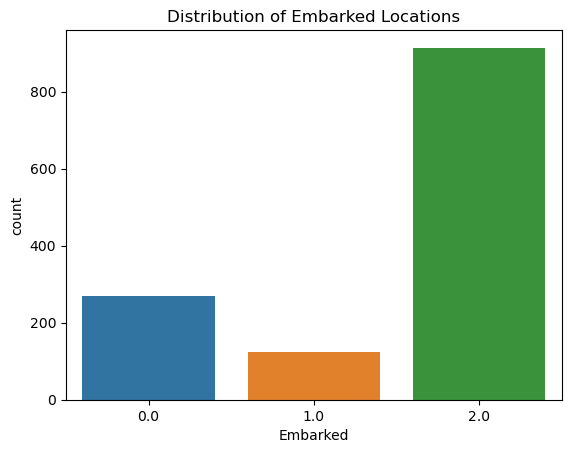

In [10]:
# Display the distribution of the 'Embarked' column
embarked_counts = df['Embarked'].value_counts()
print(embarked_counts)

# Plot the distribution
sns.countplot(x='Embarked', data=df)
plt.title('Distribution of Embarked Locations')
plt.show()


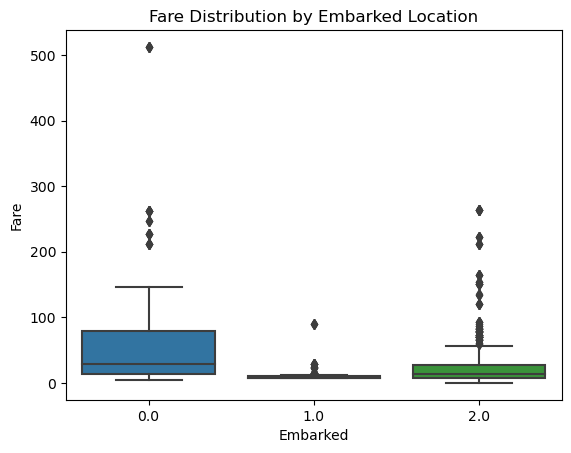

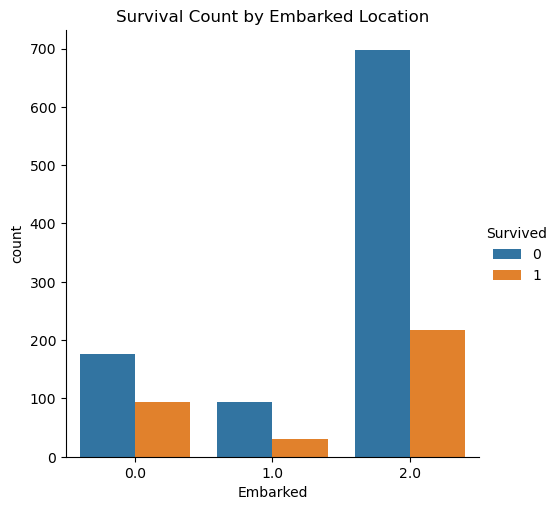

In [11]:
# Plot the relationship between 'Embarked' and 'Fare'
sns.boxplot(x='Embarked', y='Fare', data=df)
plt.title('Fare Distribution by Embarked Location')
plt.show()

# Plot the survival rate by 'Embarked' location
sns.catplot(x='Embarked', hue='Survived', kind='count', data=df)
plt.title('Survival Count by Embarked Location')
plt.show()


In [12]:
# Calculate the average Fare for each Embarked location
average_fare_by_embarked = df.groupby('Embarked')['Fare'].mean()
print(average_fare_by_embarked)

# Analyze the rows with missing 'Embarked' values to see if their 'Fare' matches any category
missing_embarked = df[df['Embarked'].isnull()]
print(missing_embarked[['Fare', 'Pclass', 'Survived']])


Embarked
0.0    62.336267
1.0    12.409012
2.0    27.404639
Name: Fare, dtype: float64
     Fare  Pclass  Survived
61   80.0       1         1
829  80.0       1         1


In [14]:
# Fill missing 'Embarked' values with the most common value
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Verify the fill
print(df['Embarked'].isnull().sum())


0


### Data Type Conversion

In [15]:
df.columns

Index(['PassengerId', 'Age', 'Fare', 'Sex', 'sibsp', 'Parch', 'Pclass',
       'Embarked', 'Survived'],
      dtype='object')

In [16]:
# Convert 'Pclass' and 'Embarked' to categorical data types
df['Pclass'] = df['Pclass'].astype('category')
df['Embarked'] = df['Embarked'].astype('category')

# Convert 'Survived' to categorical
df['Survived'] = df['Survived'].astype('category')

# Verify the changes
df.dtypes


PassengerId       int64
Age             float64
Fare            float64
Sex               int64
sibsp             int64
Parch             int64
Pclass         category
Embarked       category
Survived       category
dtype: object

In [17]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Drop duplicates if any
df.drop_duplicates(inplace=True)


Number of duplicate rows: 0


### Handling Outliers

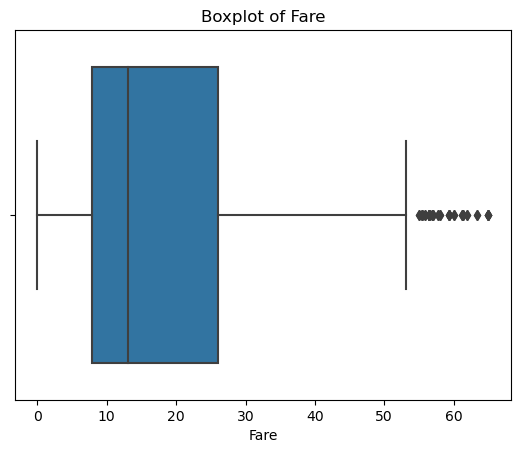

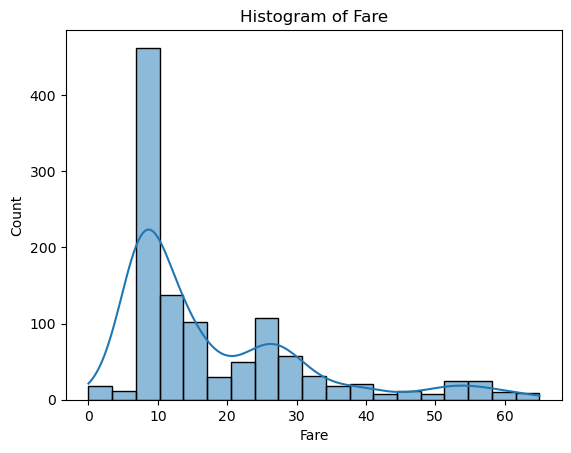

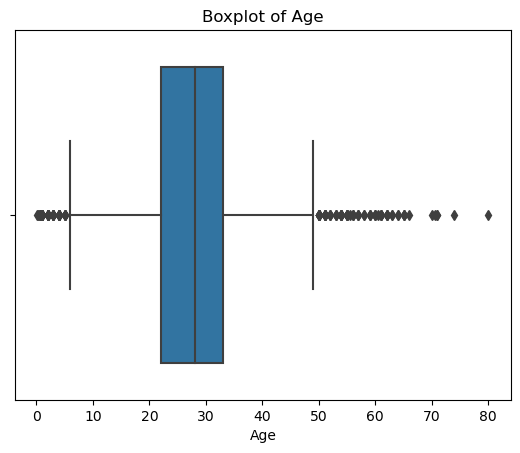

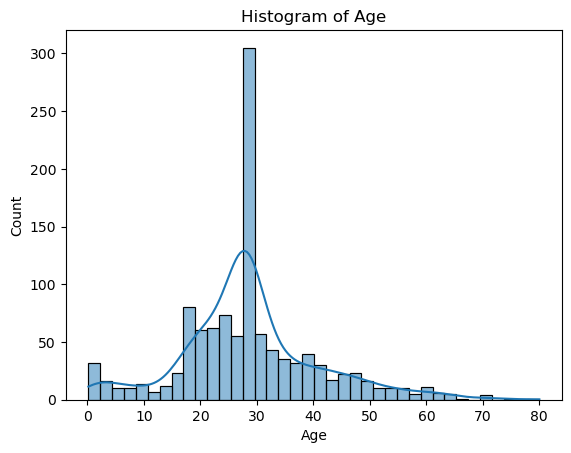

In [20]:
# Plotting a boxplot for 'Fare' to identify outliers
sns.boxplot(x=df['Fare'])
plt.title('Boxplot of Fare')
plt.show()

# Plotting a histogram for 'Fare' to see the distribution
sns.histplot(df['Fare'], kde=True)
plt.title('Histogram of Fare')
plt.show()

# Similarly, let's do the same for 'Age'
sns.boxplot(x=df['Age'])
plt.title('Boxplot of Age')
plt.show()

sns.histplot(df['Age'], kde=True)
plt.title('Histogram of Age')
plt.show()


In [18]:
# Example: Handling outliers in the 'Fare' column using the IQR method
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df = df[(df['Fare'] >= lower_bound) & (df['Fare'] <= upper_bound)]

# Display the shape of the dataset after removing outliers
print(df.shape)

(1138, 9)


In [19]:
# Save the cleaned dataset to a CSV file
df.to_csv('cleaned_titanic_data.csv', index=False)

print("Cleaned dataset saved as 'cleaned_titanic_data.csv'")


Cleaned dataset saved as 'cleaned_titanic_data.csv'
